# First Exercise with Jupyter notebook

Explore station XML files (STXML). 

### Import Modules

In [37]:
import glob
import pickle

from obspy import read_inventory

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt

## Read one inventory

From [obspy](https://docs.obspy.org/packages/obspy.core.inventory.html) wiki: "The Inventory class has a hierarchical structure, starting with a list of Networks, each containing a list of Stations which again each contain a list of Channels. The Responses are attached to the channels as an attribute."

<img src="Inventory.png" alt="Inventory Structure" width="800">

In [ ]:
! obspyDMT --datapath data_rhum_rum_iran --min_mag 6.8 --min_date 2013-04-16  --max_date 2013-04-17 --event_catalog NEIC_USGS --data_source EIDA --net YV --min_azi 50 --max_azi 55 --min_epi 94 --max_epi 100 --cha BHZ --instrument_correction

In [ ]:
inv = read_inventory("data_rhum_rum_iran/20130416_104420.a/resp/STXML.YV.EURO.00.BHZ")
print(inv)

Inventory created at 2025-08-06T14:41:17.247511Z
	Sending institution: EIDA-Federator (EIDA)
	Contains:
		Networks (1):
			YV
		Stations (1):
			YV.EURO (EUROPA)
		Channels (1):
			YV.EURO.00.BHZ


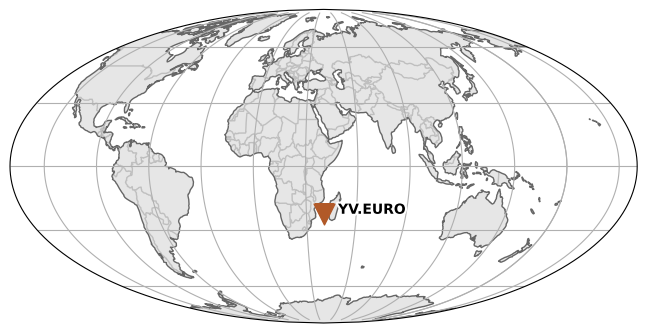

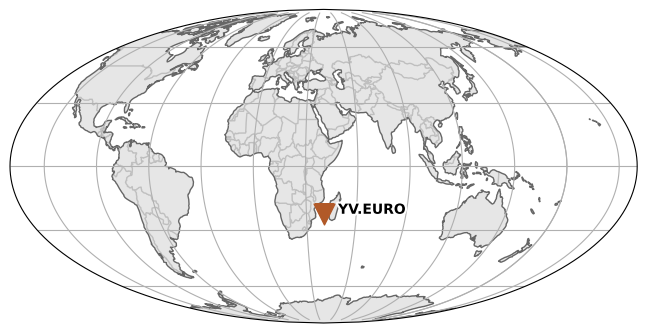

In [57]:
inv.plot()  # This will plot the inventory, showing station locations and other metadata.

In [58]:
net = inv[0]
print(f"Network: {net.code}, Description: {net.description}")

sta = net[0]
print(f"Station: {sta.code}, Description: {sta.description}")
print(f"Latitude: {sta.latitude}, Longitude: {sta.longitude}, Elevation: {sta.elevation} m")

cha = sta[0]
print(f"Channel: {cha.code}, Location: {cha.location_code}")

print(cha.response)

Network: YV, Description: Terres australes et antarctiques françaises 2011,RHUMRUM temporary experiment
Station: EURO, Description: None
Latitude: -22.344, Longitude: 40.3401, Elevation: 10.0 m
Channel: BHZ, Location: 00
Channel Response
	From M/S (Velocity) to COUNTS (Digital Counts)
	Overall Sensitivity: 1.65256e+09 defined at 1.000 Hz
	10 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1970
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 838861
		Stage 3: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 7: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 8: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 9: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 10:

## Exercise

Read in all STXML files and plot them all on one map. You need first to find the coordinates. 

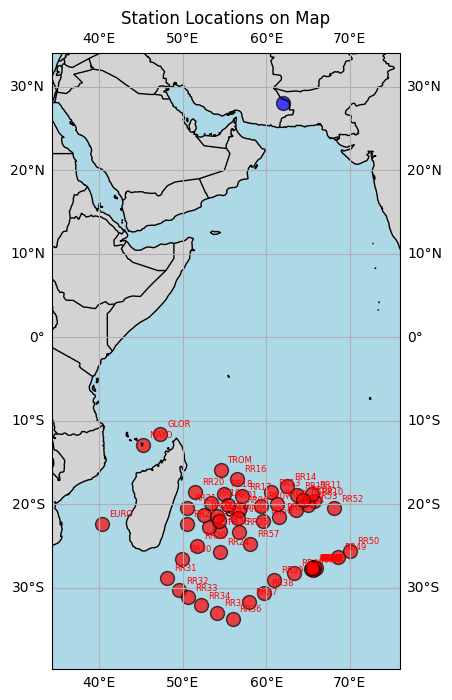

In [62]:
# Create map with geographic projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.OCEAN, color='lightblue')
ax.add_feature(cfeature.LAND, color='lightgray')

lons = []
lats = []

# events = "data_fiji_island/EVENTS-INFO/event_list_pickle"
events = "data_rhum_rum_iran/EVENTS-INFO/event_list_pickle"

with open(events, "rb") as f:
    event_list = pickle.load(f)

ax.scatter(
    event_list[0]["longitude"],
    event_list[0]["latitude"],
    c="blue",
    s=100,
    alpha=0.7,
    edgecolors="black",
    transform=ccrs.PlateCarree(),
)
lons.append(event_list[0]["longitude"])
lats.append(event_list[0]["latitude"])

# for xml in glob.glob("data_fiji_island/20140721_145441.a/resp/*"):
for xml in glob.glob("data_rhum_rum_iran/20130416_104420.a/resp/*"):
    inv = read_inventory(xml)
    sta = inv[0][0]
    lat = sta.latitude
    lon = sta.longitude
    code = sta.code

    ax.scatter(
        lon,
        lat,
        c="red",
        s=100,
        alpha=0.7,
        edgecolors="black",
        transform=ccrs.PlateCarree(),
    )

    # Add station labels
    ax.annotate(
        code,
        (lon, lat),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=6, color="red",
        transform=ccrs.PlateCarree(),
    )
    lons.append(lon)
    lats.append(lat) 
# Set extent based on station coordinates
margin = 6 # degrees
ax.set_extent(
    [
        min(lons) - margin,
        max(lons) + margin,
        min(lats) - margin,
        max(lats) + margin,
    ],
    ccrs.PlateCarree(),
)

ax.gridlines(draw_labels=True)
plt.title("Station Locations on Map")
plt.show()